In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
import seaborn as sns

In [4]:
from avgn.dataset_names import species_dict

In [5]:
hopkins_dfs = list(DATA_DIR.glob('clusterability/convex_sample/*.pickle'))
hopkins_dfs[:3]

[PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/clusterability/convex_sample/katahira_white_munia_segmented_ WM02.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/clusterability/convex_sample/katahira_white_munia_segmented_ WM42.pickle'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/clusterability/convex_sample/european_starling_gentner_segmented_ b1076.pickle')]

In [6]:
clusterability_df = pd.concat([pd.read_pickle(i) for i in tqdm(hopkins_dfs)])

In [7]:
clusterability_df[:3]

,df,dataset,indv,umap_hopkins_1,umap_hopkins_10
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,katahira_white_munia_segmented,WM02,0.993135,0.989396
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,katahira_white_munia_segmented,WM42,0.936205,0.957895
0,/mnt/cube/tsainbur/Projects/github_repos/avgn_...,european_starling_gentner_segmented,b1076,0.991003,0.991881


In [9]:
clusterability_df['species'] = [species_dict[ds]['species']  for ds in clusterability_df['dataset'].values]
clusterability_df['family'] = [species_dict[ds]['group']  for ds in clusterability_df['dataset'].values]

In [10]:
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [11]:
ensure_dir(FIGURE_DIR / 'hopkins')

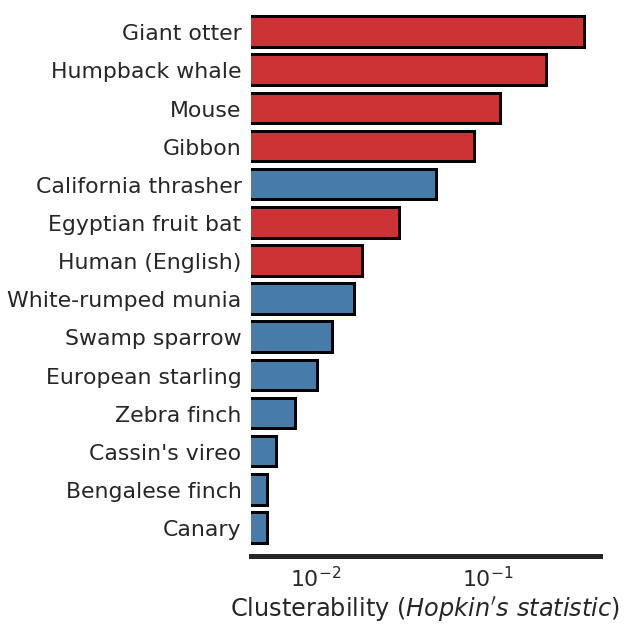

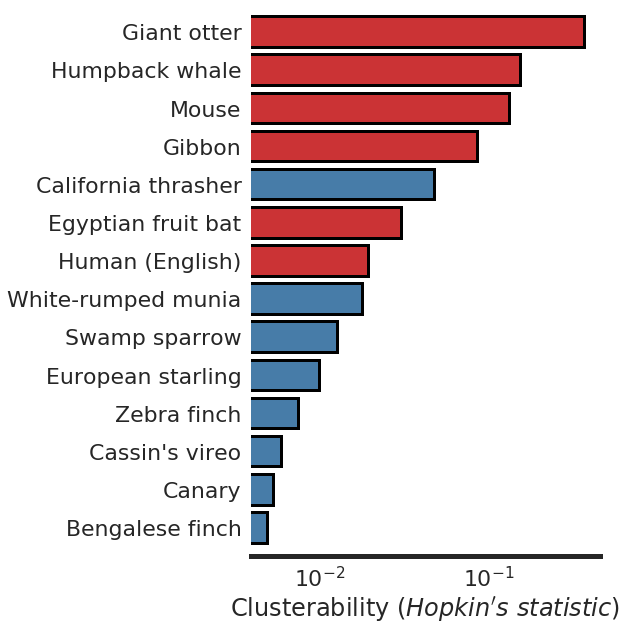

In [14]:
sns.set(style='white', font_scale=2)

for metric in ['umap_hopkins_1','umap_hopkins_10']:
    fig, ax = plt.subplots(ncols=1, figsize=(6.25, 10))

    # log scale
    result = clusterability_df.groupby(["species", 'family'])[metric].aggregate(
        np.median).reset_index().sort_values(metric)#, ascending=False)
    result[metric] = (1 - result[metric])

    # create bar chart
    bar = sns.barplot(
        x=metric,
        y="species",
        hue='family',
        dodge=False,
        data=result,
        ax=ax,
        linewidth=3,
        edgecolor="0",
        order=result['species'],
        #log=True,
        #width = 1,
        palette = sns.color_palette('Set1')
    )
    ax.set_xlabel('Clusterability ($\it{Hopkin\'s\ statistic}$)', fontsize=24)
    ax.set_ylabel('')
    ax.get_legend().remove()

    for axis in ['top','left','right']:
        ax.spines[axis].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(5)
    ax.set_xscale('log')

    ylim = ax.get_ylim()
    ax.set_ylim([ylim[0]+.25, ylim[1]])
    #ax.set_xlim([0.5,1])

    save_fig(FIGURE_DIR / 'hopkins' / ('hopkins_comparison_'+ metric), dpi=300, save_jpg=False, save_png=True, save_pdf=True)